In [ ]:
!pip install nltk
!pip install textblob
!pip install wordcloud
!python -m textblob.download_corpora
!pip install vaderSentiment
!pip install transformers
!pip install leia-br

In [1]:
import pandas as pd
df = pd.read_json('./noticias.json')

In [2]:
df.head()

,noticia,url,titulo
0,O projeto encontra-se em sua segunda edição e ...,http://www.gravatai.ifsul.edu.br/ultimas-notic...,Câmpus Gravataí e NTE/SMED realizam aula inaug...
1,Recesso por período de férias de servidores(as...,http://www.gravatai.ifsul.edu.br/ultimas-notic...,Horário Especial de Funcionamento
2,As atividades ocorreram no dia 06 de junho. De...,http://www.gravatai.ifsul.edu.br/ultimas-notic...,2º Fórum Ambiental do Câmpus Gravataí / IFSul
3,"Nos dias 09, 10 e 11 de outubro, o IFSul Grava...",http://www.gravatai.ifsul.edu.br/ultimas-notic...,V Semana Acadêmica 2023 do IFSUL Câmpus Gravataí
4,"Mantendo o histórico de sucessivas conquistas,...",http://www.gravatai.ifsul.edu.br/ultimas-notic...,Trabalhos do Campus Gravataí conquistam dois p...


# Nuvem de palavras

In [40]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('portuguese')) # + ['Gravataí', 'Câmpus', 'IFSul', 'divulga'])


def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

In [41]:
texto = ''
for t in df['titulo'].values:
  texto += ' ' + remove_stop_words(t)

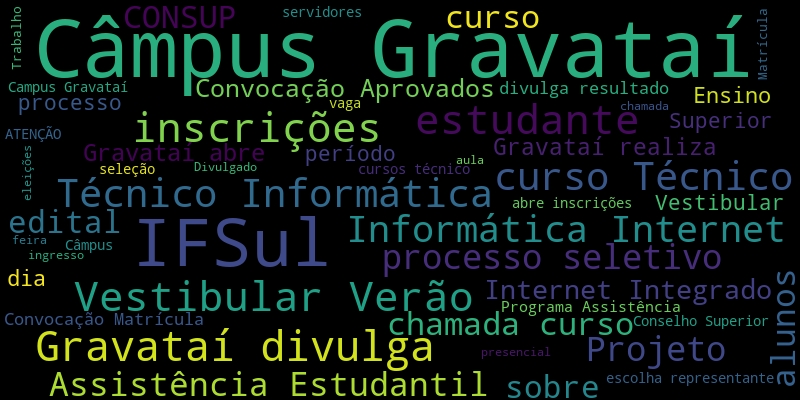

In [42]:
from wordcloud import WordCloud

wc = WordCloud(width=800, height=400, max_words=50)

wc.generate_from_text(texto).to_image()

# Tradução e sentimento com Textblob

In [6]:
from textblob import Sentence

In [7]:
for t in df[0:10]['titulo']:
    traducao = str(Sentence(t).translate(from_lang='pt', to='en'))
    #print('Tradução:', traducao)
    print(t)
    sentimento = Sentence(traducao).sentiment
    print('Sentimento:', str(sentimento))

Câmpus Gravataí e NTE/SMED realizam aula inaugural do Projeto de Extensão Formação Docente em Robótica Educacional
Sentimento: Sentiment(polarity=0.25, subjectivity=0.25)
Horário Especial de Funcionamento
Sentimento: Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714)
2º Fórum Ambiental do Câmpus Gravataí / IFSul
Sentimento: Sentiment(polarity=0.0, subjectivity=0.0)
V Semana Acadêmica 2023 do IFSUL Câmpus Gravataí
Sentimento: Sentiment(polarity=0.0, subjectivity=0.0)
Trabalhos do Campus Gravataí conquistam dois prêmios na XVI MOCITEC
Sentimento: Sentiment(polarity=0.3, subjectivity=0.2)
Projeto Descomplicando Editais 2023 divulga vídeos para promover o ingresso de estudantes na instituição
Sentimento: Sentiment(polarity=0.0, subjectivity=0.0)
Atenção comunidade acadêmica e externa!
Sentimento: Sentiment(polarity=0.0, subjectivity=0.05)
Visita dos Formandos à TECNOPUC
Sentimento: Sentiment(polarity=0.0, subjectivity=0.0)
NESTA SEMANA, TEM HORÁRIO ESPECIAL NO CÂMPUS 

In [8]:
Sentence('The address is 800, Men de Sá').sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
Sentence('John is a bad person').sentiment

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)

In [10]:
Sentence('John is a wonderful person').sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

# Sentimento com Vader

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

In [12]:
sa.polarity_scores('The address is 800, Men de Sá')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [13]:
sa.polarity_scores('John is a bad person')

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}

In [14]:
sa.polarity_scores('John is a wonderful person')

{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719}

# Sentimento com leia-br - fork do Vader para português

In [15]:
from LeIA import SentimentIntensityAnalyzer 

leia_sa = SentimentIntensityAnalyzer()

In [16]:
leia_sa.polarity_scores('O endereço do IFSUL é Men de Sá, 800')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [17]:
leia_sa.polarity_scores('João é uma má pessoa')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [18]:
leia_sa.polarity_scores('João é uma pessoa maravilhosa')

{'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'compound': 0.5994}

In [19]:
leia_sa.polarity_scores('Aconteceu um desastre')

{'neg': 0.672, 'neu': 0.328, 'pos': 0.0, 'compound': -0.6249}

# Tradução e sentimento com Transformers

In [20]:
from transformers import pipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe_traducao = pipeline("translation", model="facebook/nllb-200-distilled-600M", device=device)

/Users/dias/anaconda3/lib/python3.11/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


'NoneType' object has no attribute 'cadam32bit_grad_fp32'


In [21]:
from transformers import pipeline
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

pipe_sentimento = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions", device=device)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [22]:
traducao = pipe_traducao('João é uma pessoa maravilhosa', src_lang='en', tgt_lang='pt', max_length=400)
traducao = traducao[0]['translation_text']
sentimento = pipe_sentimento(traducao)
print(traducao)
print(sentimento)


ptm.com Joãoen is a wonderful person.
[{'label': 'admiration', 'score': 0.925193190574646}]


In [23]:
traducao = pipe_traducao('João é uma má pessoa', src_lang='en', tgt_lang='pt', max_length=400)
traducao = traducao[0]['translation_text']
sentimento = pipe_sentimento(traducao)
print(traducao)
print(sentimento)


ptm.com - Joãoen is a bad person.
[{'label': 'neutral', 'score': 0.37076273560523987}]


# Resumo com Transformers

In [24]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe_resumo = pipeline("summarization", model="facebook/bart-large-cnn")

In [26]:
num_noticia = 15

noticia = df.loc[num_noticia,'noticia']
titulo = df.loc[num_noticia,'titulo']

print(pipe_resumo(noticia, max_length=100))
print('\n\n', titulo, '\n\n', noticia)

[{'summary_text': 'Dia 14/06 iniciará, no campus Gravataí, o primeiro concurso Mickey Feio. O objetivo é premiar os três Mickeys mais feios produzidos pela comunidade discente. O prêmio principal de ter o seu desenho exposto permanentemente na escola.'}]


 Núcleo de Arte e Cultura lança concurso de desenho com temática centrada na feiura 

 O concurso Mickey Feio do IFSul Gravataí é inspirado no evento de mesmo nome que acontece em escala internacional, organizado por Stuart Marcelo e Cecília Torres. Dia 14/06 iniciará, no campus Gravataí, o primeiro concurso Mickey Feio, organizado pelo Núcleo de Arte e Cultura, coordenado pelo professor Ítalo Franco Costa. O concurso tem como objetivo premiar os três Mickeys mais feios produzidos pela comunidade discente e será aplicado ao longo do mês de junho em todas as turmas, sendo concedido ao primeiro colocado o prêmio principal de ter o seu desenho exposto permanentemente na escola em local privilegiado!    A regra do concurso é bastante sim

# Perguntas e respostas com transformers

In [43]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe_qa = pipeline("question-answering", model="deepset/roberta-base-squad2")

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [49]:
num_noticia = 15

noticia = df.loc[num_noticia,'noticia']
titulo = df.loc[num_noticia,'titulo']

print(pipe_qa(question='Quem organizou o concurso?', context=noticia))
print('\n\n', titulo, '\n\n', noticia)

{'score': 0.9101610779762268, 'start': 130, 'end': 161, 'answer': 'Stuart Marcelo e Cecília Torres'}


 Núcleo de Arte e Cultura lança concurso de desenho com temática centrada na feiura 

 O concurso Mickey Feio do IFSul Gravataí é inspirado no evento de mesmo nome que acontece em escala internacional, organizado por Stuart Marcelo e Cecília Torres. Dia 14/06 iniciará, no campus Gravataí, o primeiro concurso Mickey Feio, organizado pelo Núcleo de Arte e Cultura, coordenado pelo professor Ítalo Franco Costa. O concurso tem como objetivo premiar os três Mickeys mais feios produzidos pela comunidade discente e será aplicado ao longo do mês de junho em todas as turmas, sendo concedido ao primeiro colocado o prêmio principal de ter o seu desenho exposto permanentemente na escola em local privilegiado!    A regra do concurso é bastante simples: fazer o Mickey mais feio que você puder! Na data de início do concurso ocorrerá, no Miniauditório, a fala dos organizadores do concurso Mundial Mick